In [ ]:
pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import os

In [ ]:
import cv2


In [ ]:
DATADIR = "/content/drive/My Drive/Training data"

In [ ]:
len(DATADIR)

37

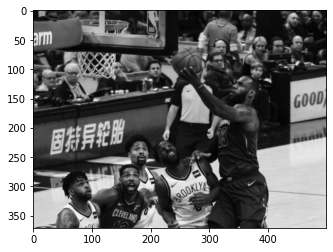

In [ ]:
CATEGORIES = ['basketball','cricket','football','swimming','tennis']

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [ ]:
print(img_array)

[[ 15  15  12 ...  10  10  15]
 [ 12  13  11 ...  11  17  28]
 [ 11  13  13 ...  17  27  42]
 ...
 [219 215 210 ... 227 227 227]
 [206 208 205 ... 225 225 225]
 [202 196 177 ... 223 223 223]]


In [ ]:
print(img_array.shape)

(371, 500)


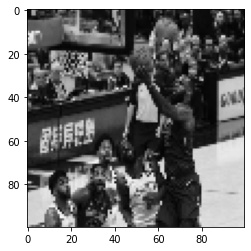

In [ ]:
IMG_SIZE = 100

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [ ]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num= CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
create_training_data()

In [ ]:
print(len(training_data))

3427


In [ ]:
import random

random.shuffle(training_data)

In [ ]:
for sample in training_data:
    print(sample[1])

In [ ]:
X=[]
y=[]

In [ ]:
for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [ ]:
import pickle

In [ ]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X= pickle.load(pickle_in)

In [ ]:
X[1]

array([[[ 13],
        [ 13],
        [ 19],
        ...,
        [ 12],
        [ 12],
        [ 15]],

       [[ 19],
        [ 14],
        [ 16],
        ...,
        [ 13],
        [ 13],
        [ 16]],

       [[ 24],
        [ 14],
        [ 13],
        ...,
        [ 13],
        [ 14],
        [ 17]],

       ...,

       [[ 28],
        [ 14],
        [ 12],
        ...,
        [245],
        [246],
        [ 14]],

       [[ 35],
        [ 14],
        [  8],
        ...,
        [237],
        [249],
        [ 11]],

       [[ 40],
        [ 19],
        [ 10],
        ...,
        [241],
        [245],
        [144]]], dtype=uint8)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import time
import pickle




X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))
import numpy as np
X = np.array(X)
y = np.array(y)
X = X/255.0

model =Sequential()
model.add(    Conv2D(64,(3,3),input_shape = X.shape[1:])   )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])




model.fit(X,y,batch_size=32,epochs=100,validation_split=0.2)


Epoch 1/100
86/86 [==============================] - 62s 722ms/step - loss: 1.4325 - accuracy: 0.3670 - val_loss: 1.3549 - val_accuracy: 0.4490
Epoch 2/100
86/86 [==============================] - 62s 719ms/step - loss: 1.2478 - accuracy: 0.4973 - val_loss: 1.2148 - val_accuracy: 0.5073
Epoch 3/100
86/86 [==============================] - 62s 720ms/step - loss: 1.0999 - accuracy: 0.5750 - val_loss: 1.2134 - val_accuracy: 0.5117
Epoch 4/100
86/86 [==============================] - 62s 721ms/step - loss: 0.9864 - accuracy: 0.6271 - val_loss: 1.2958 - val_accuracy: 0.4869
Epoch 5/100
86/86 [==============================] - 62s 718ms/step - loss: 0.8653 - accuracy: 0.6789 - val_loss: 1.3064 - val_accuracy: 0.5262
Epoch 6/100
86/86 [==============================] - 62s 720ms/step - loss: 0.7001 - accuracy: 0.7468 - val_loss: 1.2524 - val_accuracy: 0.5641
Epoch 7/100
86/86 [==============================] - 62s 723ms/step - loss: 0.5496 - accuracy: 0.8085 - val_loss: 1.4435 - val_accuracy:

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
model.save('ALSV-CNN.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ALSV-CNN.model/assets


In [ ]:
import cv2

In [ ]:
model = tf.keras.models.load_model("ALSV-CNN.model")

In [ ]:
import tensorflow as tf

In [ ]:
CATEGORIES = ['basketball','cricket','football','swimming','tennis']

def prepare(filepath):
    IMG_SIZE = 100
    img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [ ]:
pip install keras

# New Section

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        3